In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregando Dados

In [2]:
df_shoes = pd.read_csv('netshoes/netshoes.csv')
print(df_shoes.columns)
print(df_shoes.shape)
df_shoes.head()

Index(['brand', 'category', 'colors', 'customer_recommendation_rate',
       'customer_reviews_number', 'customer_score', 'description', 'gender',
       'image_urls', 'images', 'material', 'name', 'nationality', 'price',
       'raw_name', 'tags', 'url', 'usage_type'],
      dtype='object')
(32194, 18)


,brand,category,colors,customer_recommendation_rate,customer_reviews_number,customer_score,description,gender,image_urls,images,material,name,nationality,price,raw_name,tags,url,usage_type
0,adidas,duramo,"branco,cinza",95.0,3633,4.48,"Boa tênis de academia, o Adidas Duramo Lite 2 ...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"COL-3586-158_zoom1.jpg,COL-3586-158_zoom2.jpg,...",sintético,adidas duramo lite 2 0,estrangeira - adquirida no mercado interno,164.99,tênis adidas duramo lite 2 0 masculino,"branco,cinza,masculino,duramo,corrida,sintétic...",https://www.netshoes.com.br/tenis-adidas-duram...,corrida
1,adidas,duramo,"cinza,branco",95.0,3633,4.48,"Boa tênis de academia, o Adidas Duramo Lite 2 ...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"COL-3586-226_zoom1.jpg,COL-3586-226_zoom2.jpg,...",sintético,adidas duramo lite 2 0,nacional,229.99,tênis adidas duramo lite 2 0 masculino,"cinza,branco,masculino,duramo,corrida,sintétic...",https://www.netshoes.com.br/tenis-adidas-duram...,corrida
2,mizuno,NaN,preto,97.0,910,4.59,Inspire-se para criar produções esportivas com...,masculino,https://static.netshoes.com.br/produtos/tenis-...,"D16-2255-006_zoom1.jpg,D16-2255-006_zoom2.jpg,...",mesh,mizuno jet 3 n,nacional,159.99,tênis mizuno jet 3 n masculino,"preto,masculino,dia a dia,mesh,nacional,mizuno",https://www.netshoes.com.br/tenis-mizuno-jet-3...,dia a dia
3,adidas,amortecimento,"preto,branco",97.0,1031,4.70,"Ideal para corredoras amadoras ou iniciantes, ...",feminino,https://static.netshoes.com.br/produtos/tenis-...,"COL-4395-026_zoom1.jpg,COL-4395-026_zoom2.jpg,...",sintético e têxtil,adidas duramo lite 2,nacional,149.99,tênis adidas duramo lite 2 feminino,"preto,branco,feminino,amortecimento,dia a dia,...",https://www.netshoes.com.br/tenis-adidas-duram...,dia a dia
4,adidas,duramo,"vermelho,preto",95.0,3633,4.48,"Boa tênis de academia, o Adidas Duramo Lite 2 ...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"COL-3586-068_zoom1.jpg,COL-3586-068_zoom2.jpg,...",sintético,adidas duramo lite 2 0,nacional,149.99,tênis adidas duramo lite 2 0 masculino,"vermelho,preto,masculino,duramo,corrida,sintét...",https://www.netshoes.com.br/tenis-adidas-duram...,corrida


In [3]:
df_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32194 entries, 0 to 32193
Data columns (total 18 columns):
brand                           32176 non-null object
category                        9915 non-null object
colors                          32194 non-null object
customer_recommendation_rate    31738 non-null float64
customer_reviews_number         32194 non-null int64
customer_score                  32194 non-null float64
description                     32111 non-null object
gender                          32194 non-null object
image_urls                      32194 non-null object
images                          32194 non-null object
material                        32194 non-null object
name                            32194 non-null object
nationality                     32194 non-null object
price                           32194 non-null float64
raw_name                        32194 non-null object
tags                            32194 non-null object
url                       

In [4]:
df_shoes.describe()

,customer_recommendation_rate,customer_reviews_number,customer_score,price
count,31738.000000,32194.000000,32194.000000,32194.000000
mean,93.448831,142.694136,4.472157,173.083840
std,9.237133,410.714225,0.487010,120.597483
min,50.000000,1.000000,1.000000,22.900000
25%,91.000000,6.000000,4.310000,79.990000
50%,96.000000,25.000000,4.570000,149.990000
75%,100.000000,92.000000,4.750000,229.900000
max,100.000000,5411.000000,5.000000,1299.990000


# Análise Exploratória
## Unique Values

In [5]:
for column in df_shoes.select_dtypes(exclude=["number"]).columns:
    print(f"{column}:")
    print(f"    {df_shoes[column].nunique()} valores únicos")

brand:
    164 valores únicos
category:
    59 valores únicos
colors:
    493 valores únicos
description:
    3161 valores únicos
gender:
    5 valores únicos
image_urls:
    11710 valores únicos
images:
    11710 valores únicos
material:
    27 valores únicos
name:
    2702 valores únicos
nationality:
    6 valores únicos
raw_name:
    3037 valores únicos
tags:
    8324 valores únicos
url:
    11715 valores únicos
usage_type:
    8 valores únicos


# Análise Exploratória
## Análise Univariada
### Features Categóricas

In [6]:
def plot_value_counts(df,column,kind):
    if(kind == 'barh'):
        plt.figure(figsize=(10,25))
    else:
        plt.figure(figsize=(16,5))
    np.log(df[column].value_counts()).plot(kind=kind,title=f"{column}")
    plt.show()

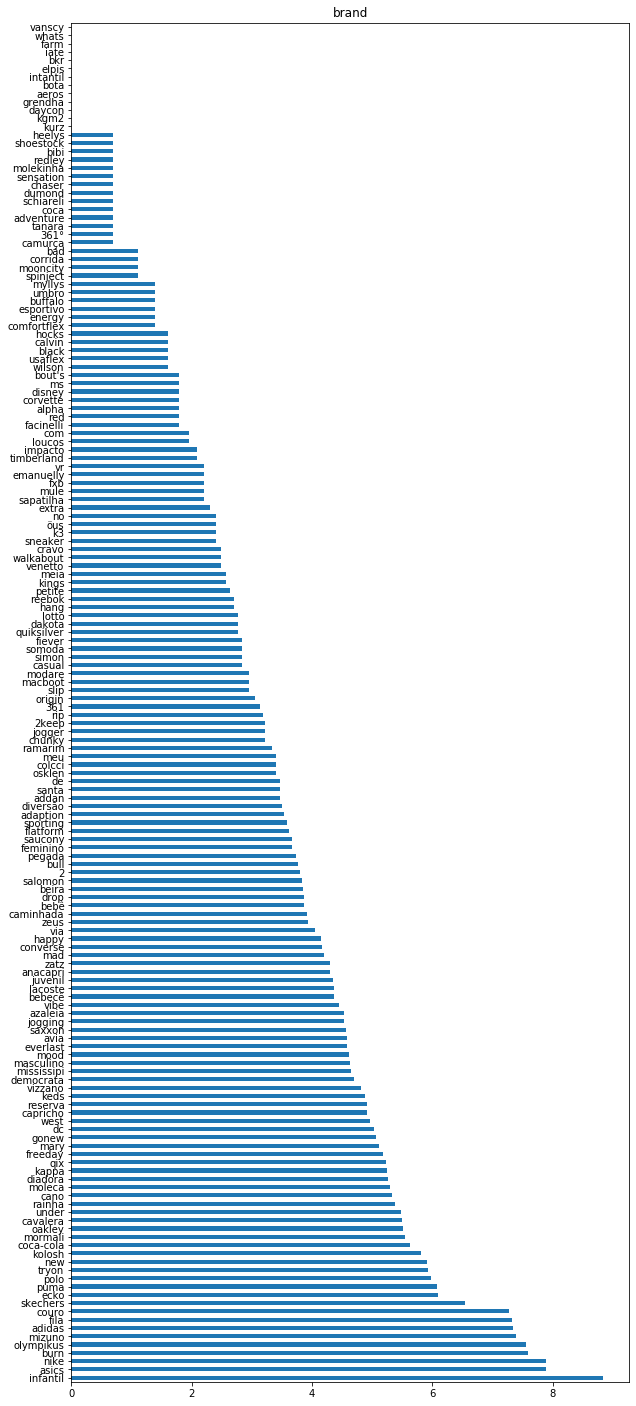

In [7]:
plot_value_counts(df_shoes,'brand','barh')

In [8]:
old_shape = df_shoes.shape[0]
df_shoes = df_shoes[~df_shoes['raw_name'].str.contains('infantil')]
old_shape - df_shoes.shape[0]

7226

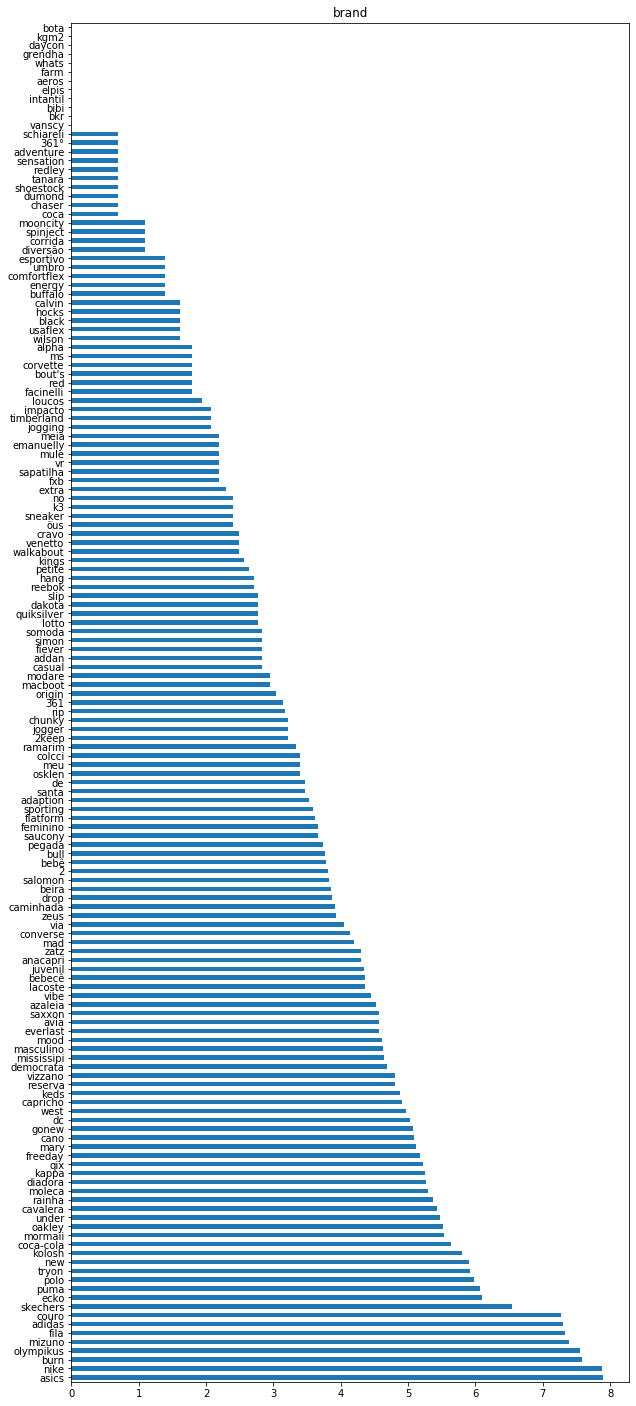

In [9]:
plot_value_counts(df_shoes,'brand','barh')

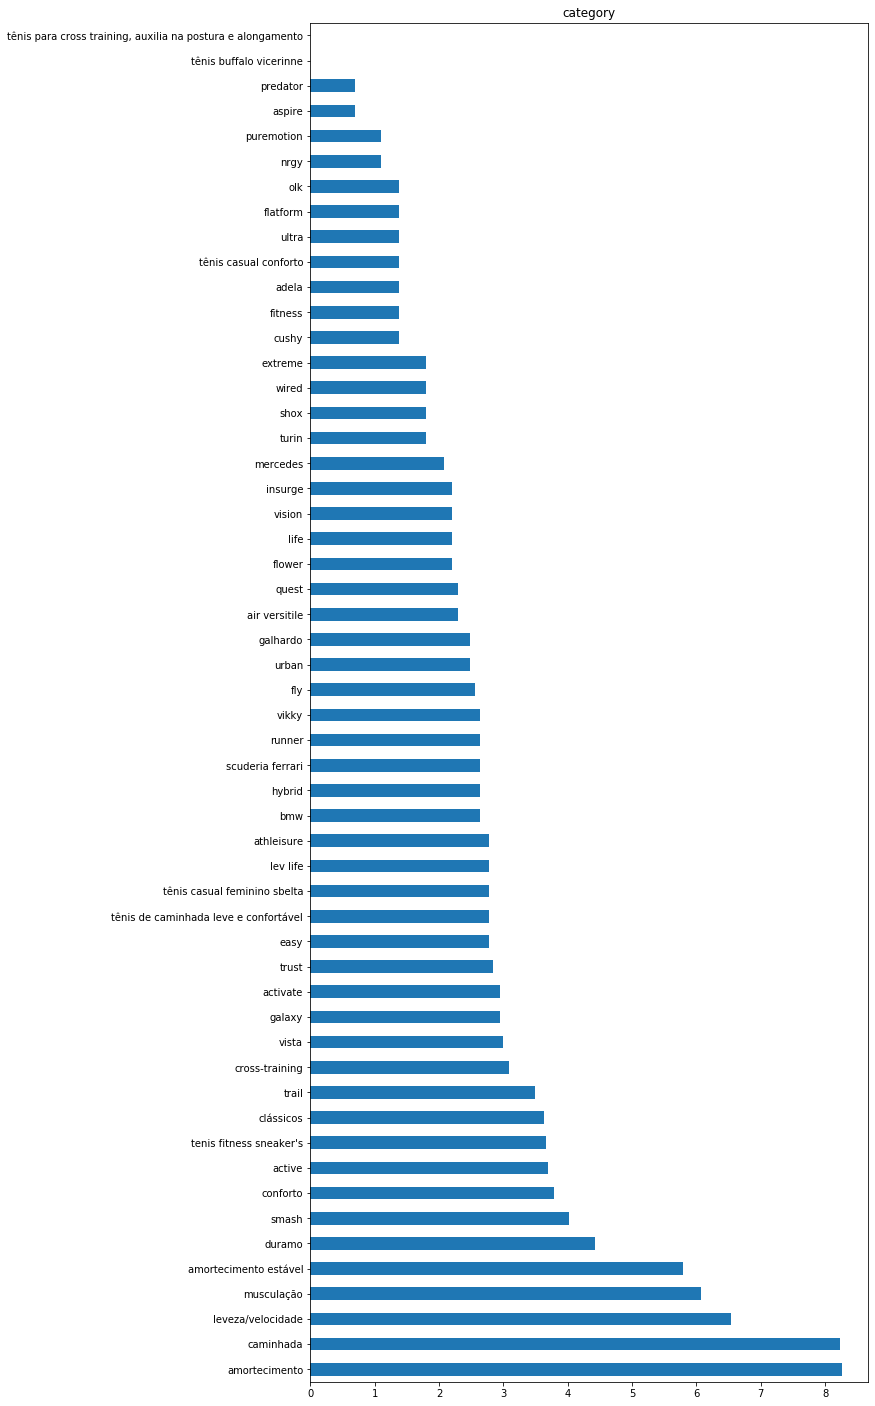

In [10]:
plot_value_counts(df_shoes,'category','barh')

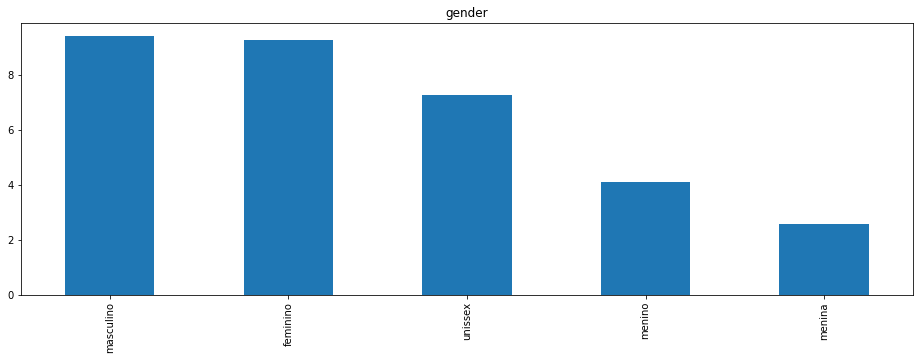

In [11]:
plot_value_counts(df_shoes,'gender','bar')

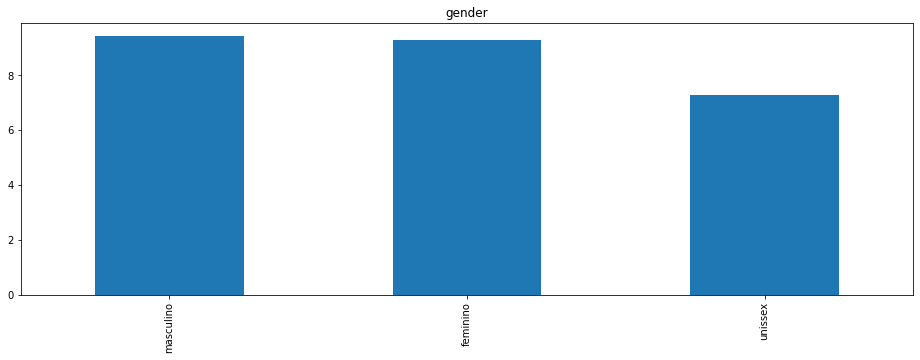

In [12]:
df_shoes.loc[df_shoes['gender']=='menino','gender'] = 'masculino'
df_shoes.loc[df_shoes['gender']=='menina','gender'] = 'feminino'

plot_value_counts(df_shoes,'gender','bar')

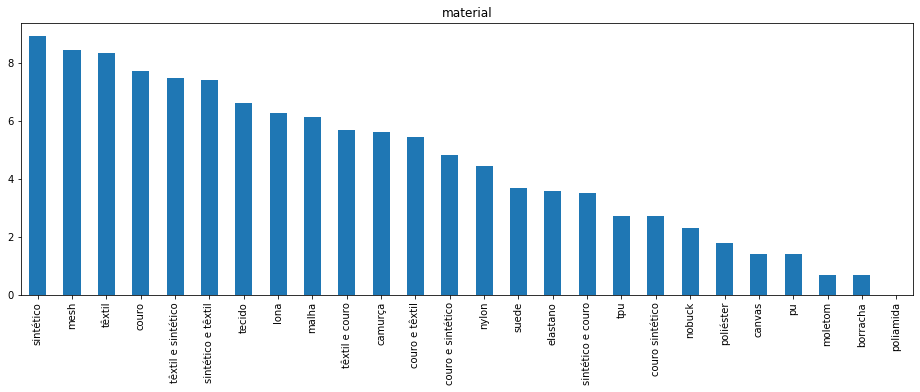

In [16]:
plot_value_counts(df_shoes,'material',kind='bar')

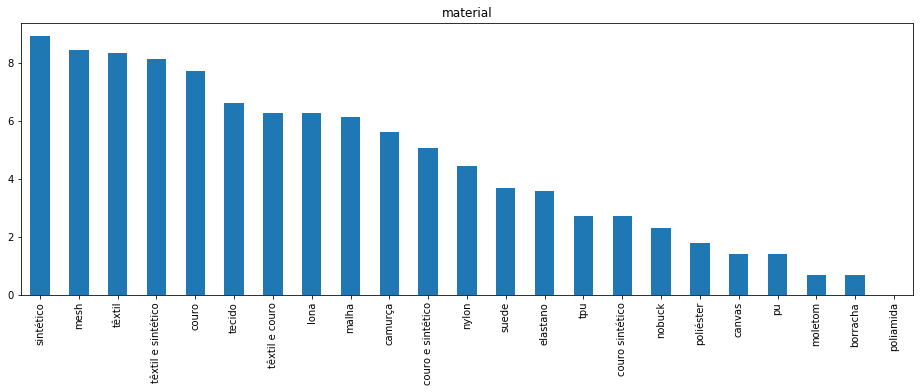

In [19]:
df_shoes.loc[df_shoes['material']=='sintético e couro','material'] = 'couro e sintético'
df_shoes.loc[df_shoes['material']=='sintético e têxtil','material'] = 'têxtil e sintético'
df_shoes.loc[df_shoes['material']=='couro e têxtil','material'] = 'têxtil e couro'

plot_value_counts(df_shoes,'material','bar')

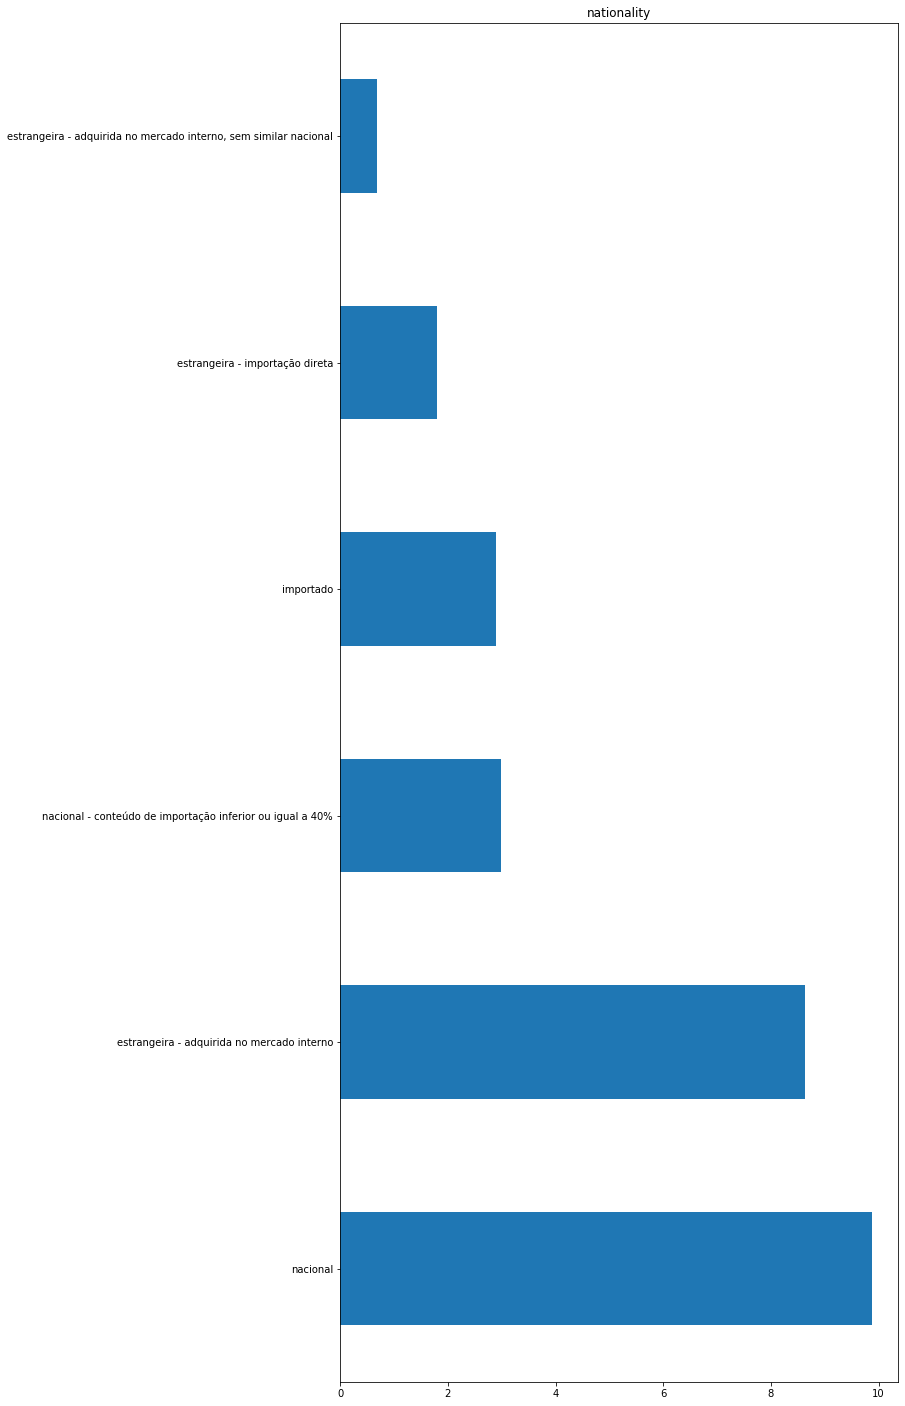

In [20]:
plot_value_counts(df_shoes,'nationality','barh')

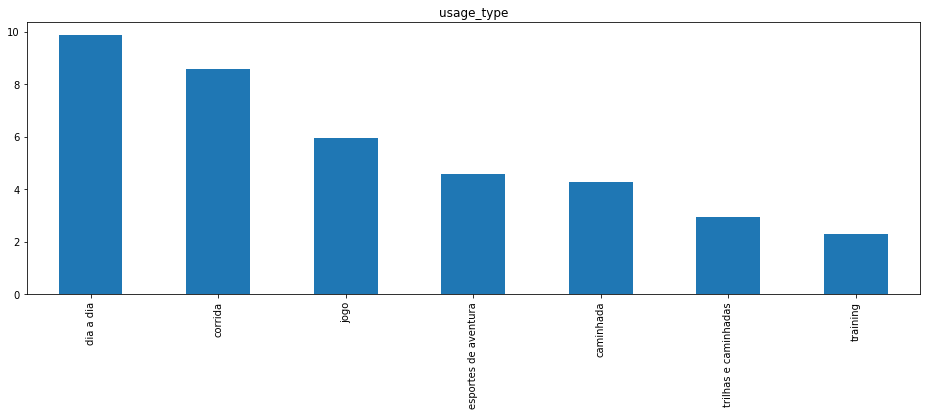

In [21]:
plot_value_counts(df_shoes,'usage_type','bar')

## Features numéricas

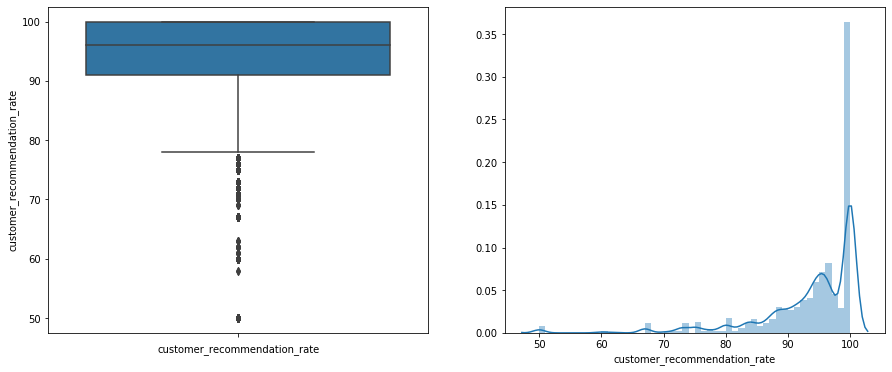

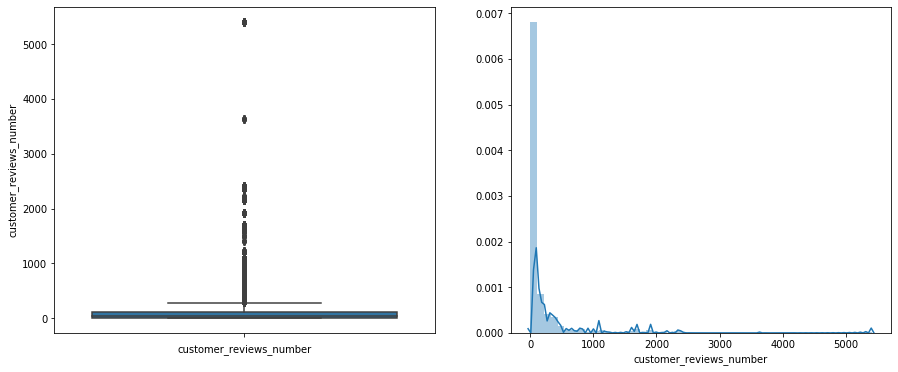

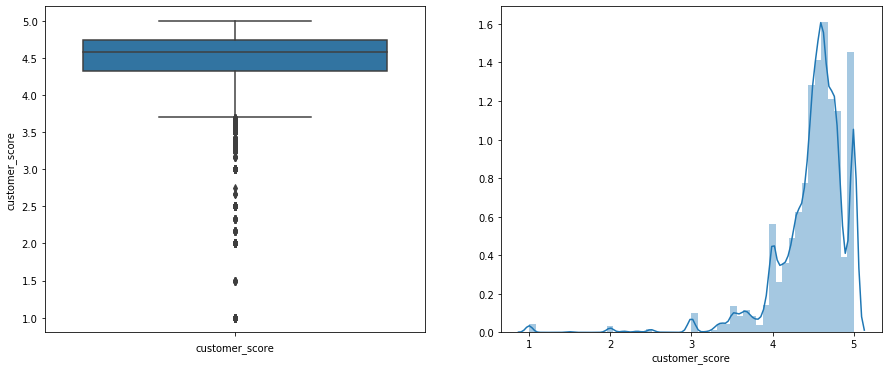

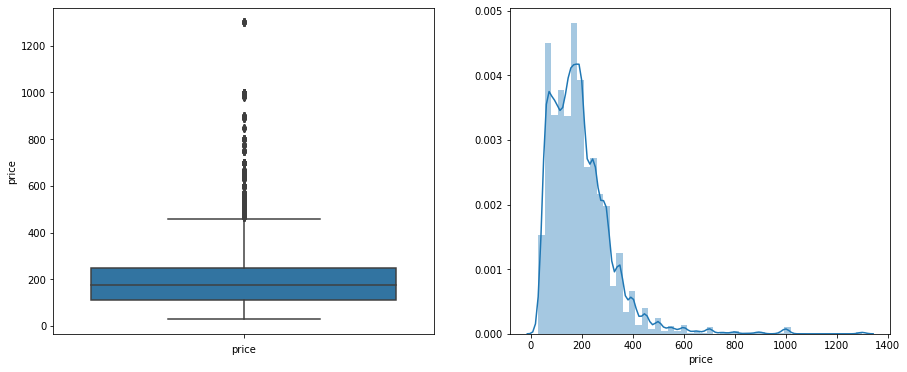

In [22]:
for col in df_shoes.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_shoes[col])
    fig.set_ylabel(col)
    fig.set_xlabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_shoes[col].dropna())
    fig.set_xlabel(col)

    plt.show()

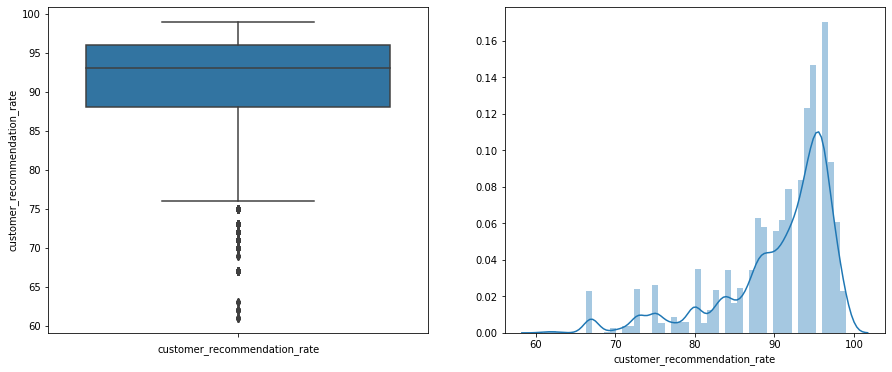

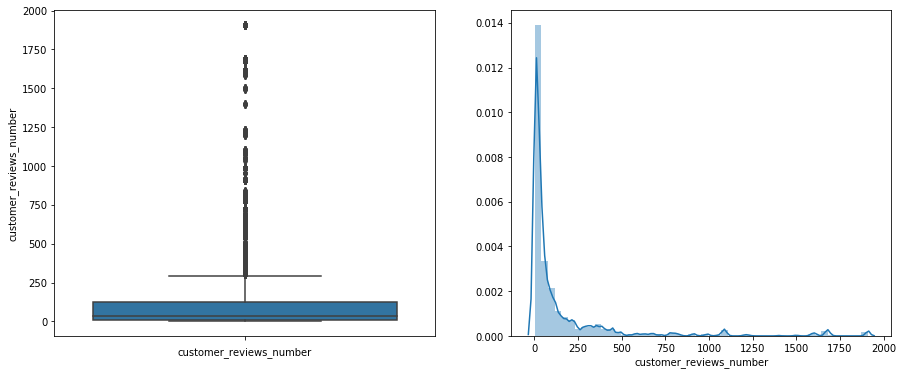

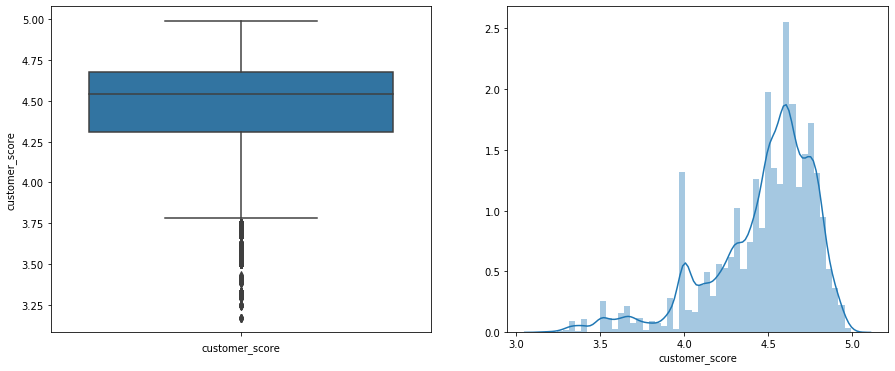

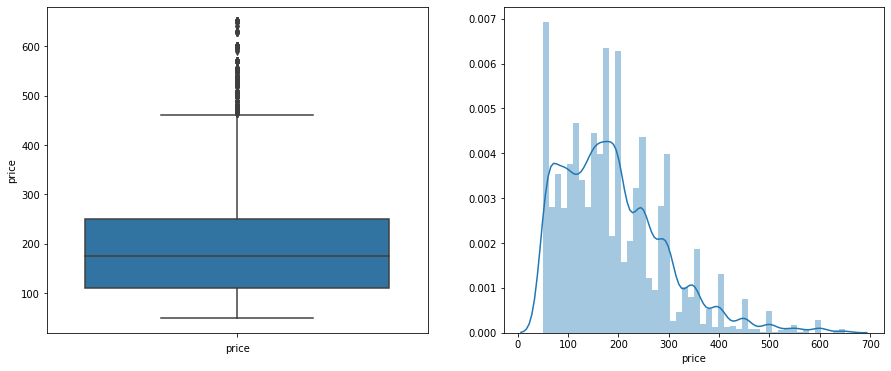

In [23]:
for col in df_shoes.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_shoes[(df_shoes[col] > df_shoes[col].quantile(q=0.01)) &
                               (df_shoes[col] < df_shoes[col].quantile(q=0.99))][col])
        
    fig.set_ylabel(col)
    fig.set_xlabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_shoes[(df_shoes[col] > df_shoes[col].quantile(q=0.01)) &
                               (df_shoes[col] < df_shoes[col].quantile(q=0.99))][col])
    fig.set_xlabel(col)

    plt.show()

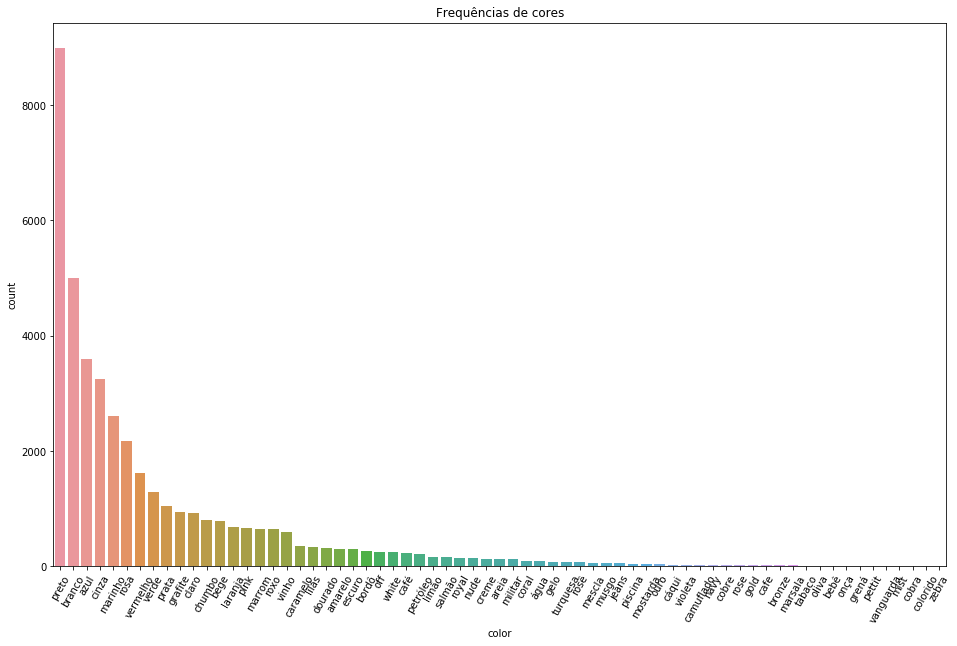

In [134]:
colors = []
[[colors.append(color) for color in row.split(',')] for row in df_shoes['colors'].values]

counts = np.asarray(np.unique(colors,return_counts=True)).T
counts = pd.DataFrame(counts,columns=['color','count'])
counts['count'] = counts['count'].astype(float)
counts = counts.sort_values('count',ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x='color',y='count',data=counts)
plt.title("Frequências de cores")
plt.xticks(rotation=60)
plt.show()

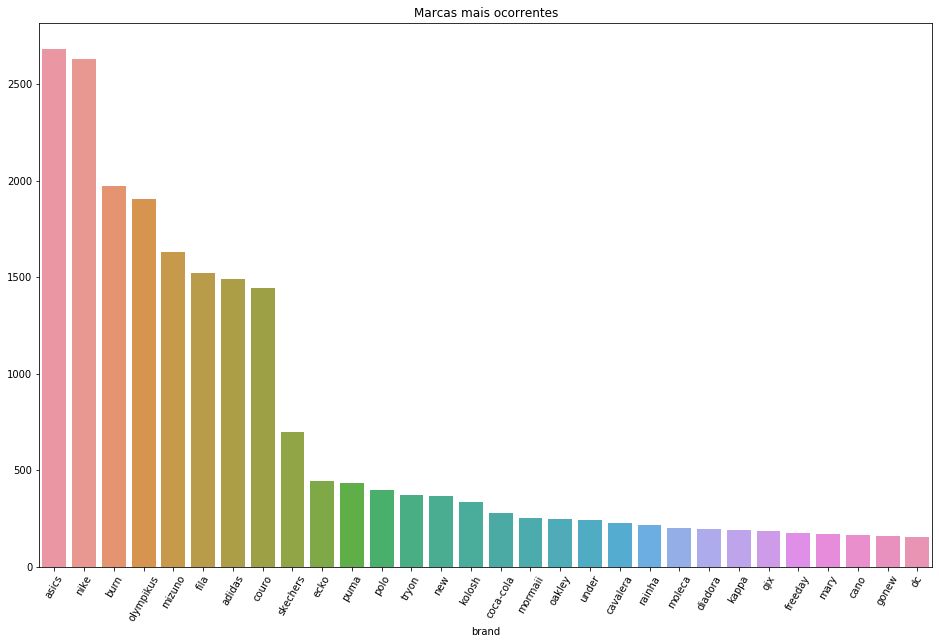

In [135]:
largest_brands = df_shoes.groupby(['brand'])['brand'].count().nlargest(30)
plt.figure(figsize=(16,10))
plt.xticks(rotation=60)
plt.title("Marcas mais ocorrentes")
sns.barplot(x=largest_brands.index,y=largest_brands.values)

## Análise Bivariada

In [24]:
df_shoes.columns

Index(['brand', 'category', 'colors', 'customer_recommendation_rate',
       'customer_reviews_number', 'customer_score', 'description', 'gender',
       'image_urls', 'images', 'material', 'name', 'nationality', 'price',
       'raw_name', 'tags', 'url', 'usage_type'],
      dtype='object')

In [206]:
def plot_ordered_by_y(x,y,data,rotation=50):
    ordered_axis = (data.groupby([x]).
                 agg({y : 'mean'}).
                 reset_index().sort_values(y,ascending=False)[x].values)

    sns.catplot(y=y,x=x,data=data, kind='bar', aspect=2,
                order=ordered_axis)
    plt.xticks(rotation=rotation)
    plt.title(f"{x.upper()} X {y.upper()}")
    plt.show()

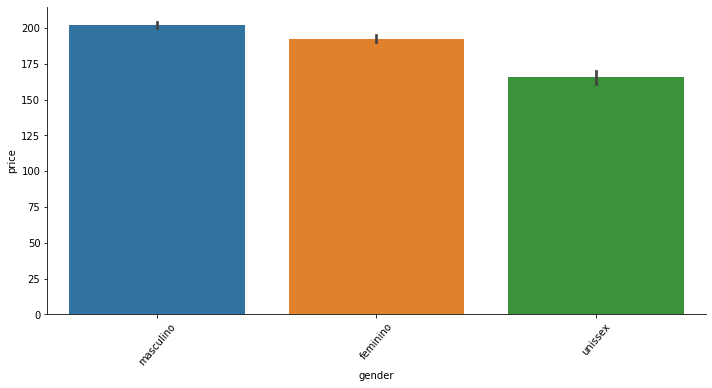

In [158]:
plot_ordered_by_y('gender','price',df_shoes)

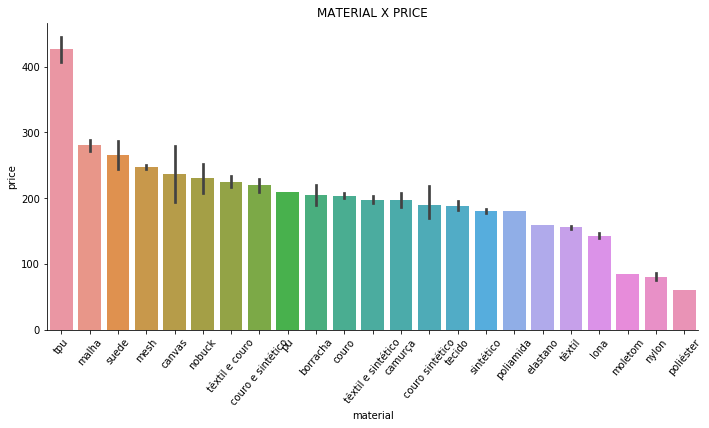

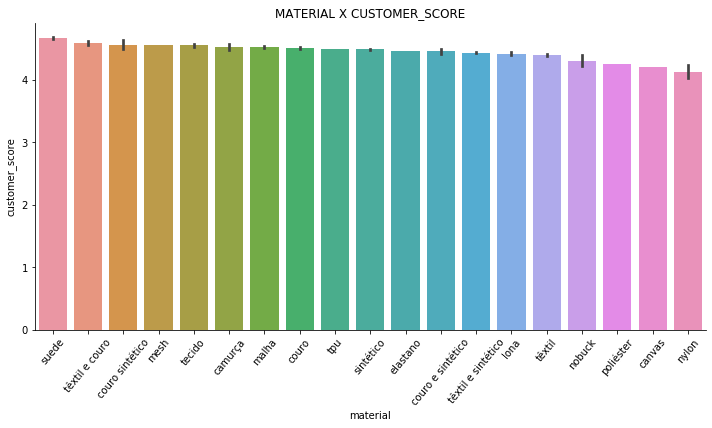

In [208]:
plot_ordered_by_y('material','price',df_shoes)

plot_ordered_by_y('material','customer_score',df_shoes[df_shoes['customer_reviews_number'] > 
                                                       df_shoes['customer_reviews_number'].quantile(0.1)])

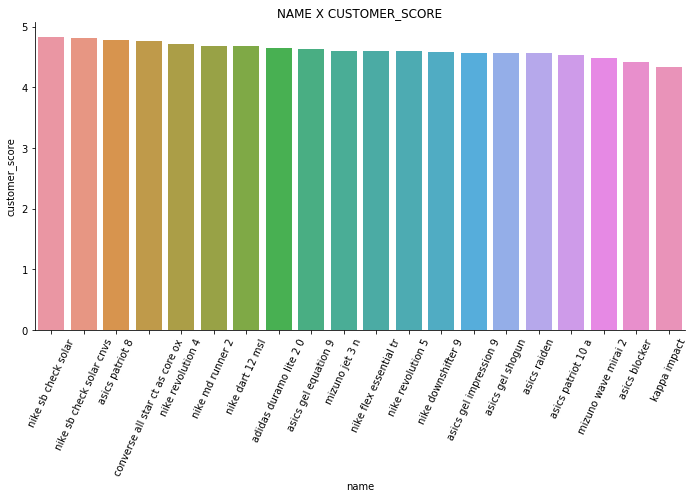

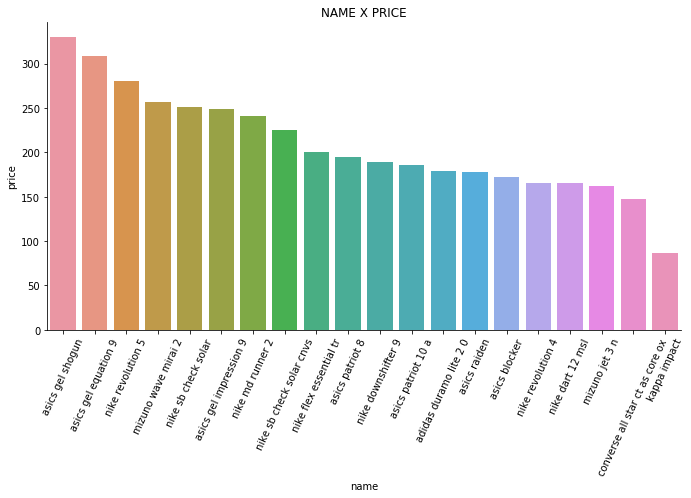

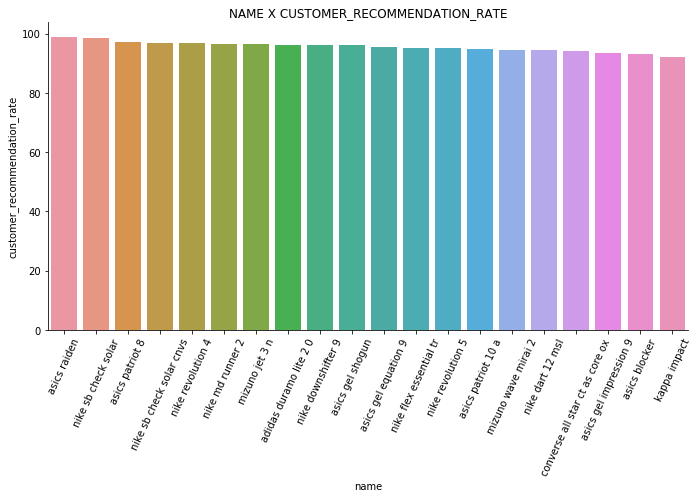

In [207]:
groupby_name_score = df_shoes.groupby('name').agg({'customer_score' : 'mean', 'customer_reviews_number' : 'sum',
                                                   'customer_recommendation_rate' : 'mean',
                                                   'price' : 'mean'}).reset_index()
plot_ordered_by_y('name','customer_score',
                   groupby_name_score.loc[groupby_name_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

plot_ordered_by_y('name','price',
                   groupby_name_score.loc[groupby_name_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

plot_ordered_by_y('name','customer_recommendation_rate',
                   groupby_name_score.loc[groupby_name_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

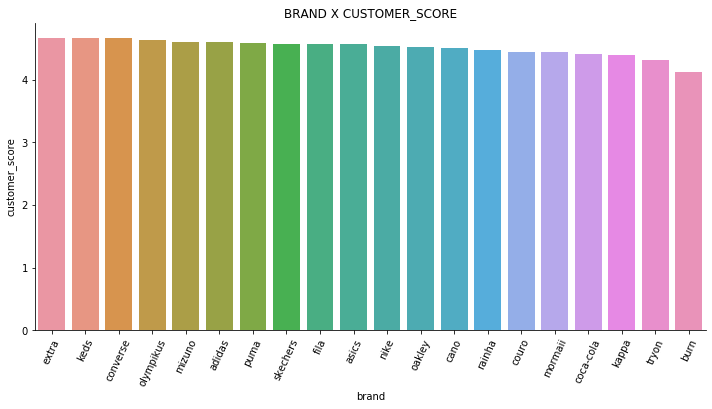

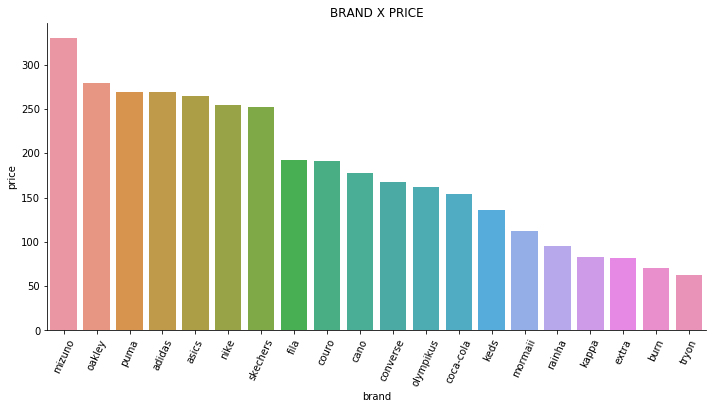

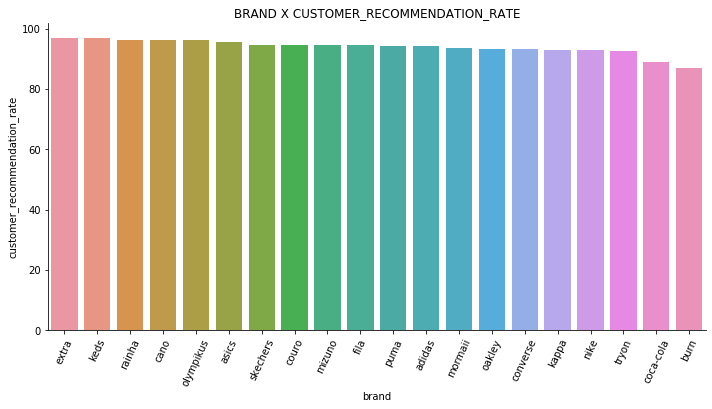

In [211]:
groupby_brand_score = df_shoes.groupby(['brand']).agg({'customer_score' : 'mean', 'customer_reviews_number' : 'sum',
                                                       'customer_recommendation_rate' : 'mean',
                                                       'price' : 'mean'}).reset_index()
plot_ordered_by_y('brand','customer_score',
                   groupby_brand_score.loc[groupby_brand_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

plot_ordered_by_y('brand','price',
                   groupby_brand_score.loc[groupby_brand_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

plot_ordered_by_y('brand','customer_recommendation_rate',
                   groupby_brand_score.loc[groupby_brand_score.nlargest(20,'customer_reviews_number').index],
                  rotation=65)

using pre selected brand names, infantil, couro